In [1]:
#loading reuters dataset

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

#the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data. You have 8,982 training examples and 2,246 test examples:

Using TensorFlow backend.


2113536/2110848 [==============================] - 15s 7us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
#Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 4s 7us/step


In [7]:
#Encoding the data

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)  #vectorized train
x_test = vectorize_sequences(test_data)    #vectorized test

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
    
one_hot_train_labels = to_one_hot(train_labels)  #vectorized train
one_hot_test_labels = to_one_hot(test_labels)    #vectorized test

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
#model definition

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
#Compiling the model

model.compile(optimizer='rmsprop',
         loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#Setting a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [28]:
#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 149us/step - loss: 3.6126 - acc: 0.3514 - val_loss: 3.6030 - val_acc: 0.3540
Epoch 2/20
7982/7982 [==============================] - 1s 177us/step - loss: 3.5938 - acc: 0.3514 - val_loss: 3.5844 - val_acc: 0.3540
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 3.5753 - acc: 0.3514 - val_loss: 3.5660 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 1s 147us/step - loss: 3.5569 - acc: 0.3514 - val_loss: 3.5478 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 1s 146us/step - loss: 3.5387 - acc: 0.3514 - val_loss: 3.5297 - val_acc: 0.3540
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 3.5206 - acc: 0.3514 - val_loss: 3.5116 - val_acc: 0.3540
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss: 3.5027 - acc: 0.3514 - val_loss: 3.4938 - val_acc: 0.3540


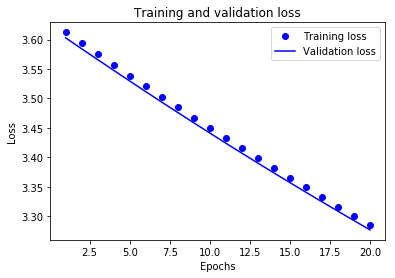

In [30]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

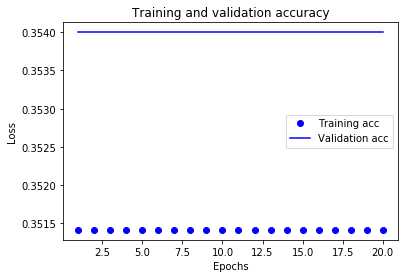

In [31]:
#Plotting the training and validation accuracy

plt.clf()  #Clears the data
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 215us/step - loss: 3.8118 - acc: 0.0605 - val_loss: 3.7978 - val_acc: 0.0460
Epoch 2/10
7982/7982 [==============================] - 1s 160us/step - loss: 3.7880 - acc: 0.2051 - val_loss: 3.7769 - val_acc: 0.2220
Epoch 3/10
7982/7982 [==============================] - 1s 148us/step - loss: 3.7675 - acc: 0.3302 - val_loss: 3.7568 - val_acc: 0.2220
Epoch 4/10
7982/7982 [==============================] - 1s 146us/step - loss: 3.7475 - acc: 0.2528 - val_loss: 3.7371 - val_acc: 0.3530
Epoch 5/10
7982/7982 [==============================] - 1s 145us/step - loss: 3.7278 - acc: 0.3424 - val_loss: 3.7175 - val_acc: 0.3530
Epoch 6/10
7982/7982 [==============================] - 1s 143us/step - loss: 3.7082 - acc: 0.3514 - val_loss: 3.6981 - val_acc: 0.3530
Epoch 7/10
7982/7982 [==============================] - 1s 147us/step - loss: 3.6888 - acc: 0.3514 - val_loss: 3.6788 - val_acc: 0.3530


In [33]:
results

[3.6242960284887844, 0.36153161180730603]